### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

### Reading csv file

In [2]:
tennis = pd.read_csv('tennis_stats.csv')
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


### Exploratory Analysis 

In [3]:
# Function to plot offensive game statistics against outcomes
def offensive_vrs_outcomes(df):
    df_offensive = df[['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon']]
    df_outcomes = df[['Wins', 'Losses', 'Winnings', 'Ranking']]
    for col in df_offensive.columns:
        plt.scatter(df_outcomes.Wins, df_offensive[col])
        plt.xlabel('Wins')
        plt.ylabel(col)
        plt.title(col + ' against Wins')
        plt.show()
        plt.clf()
    for col in df_offensive.columns:
        plt.scatter(df_outcomes.Losses, df_offensive[col])
        plt.xlabel('Losses')
        plt.ylabel(col)
        plt.title(col + ' against Losses')
        plt.show()
        plt.clf()
    for col in df_offensive.columns:
        plt.scatter(df_outcomes.Winnings, df_offensive[col])
        plt.xlabel('Winnings')
        plt.ylabel(col)
        plt.title(col + ' against Winnings')
        plt.show()
        plt.clf()
    for col in df_offensive.columns:
        plt.scatter(df_outcomes.Ranking, df_offensive[col])
        plt.xlabel('Rankings')
        plt.ylabel(col)
        plt.title(col + ' against Rankings')
        plt.show()
        plt.clf()

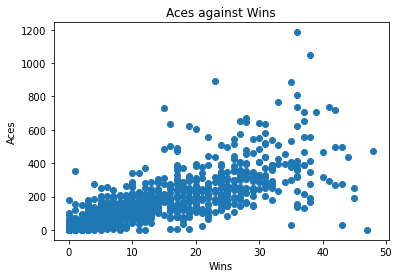

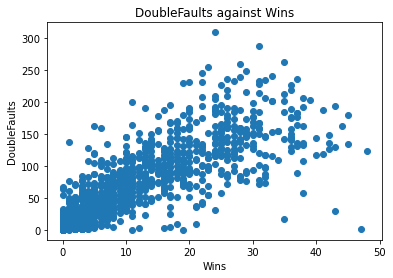

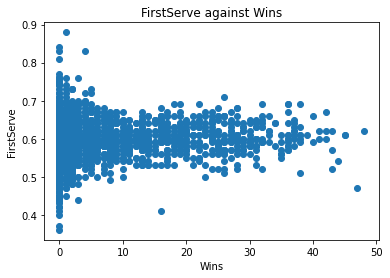

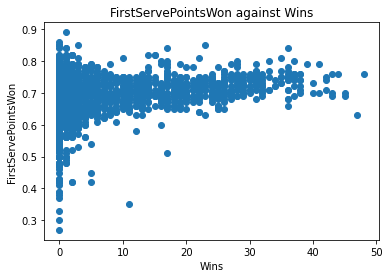

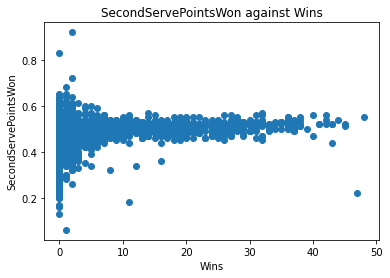

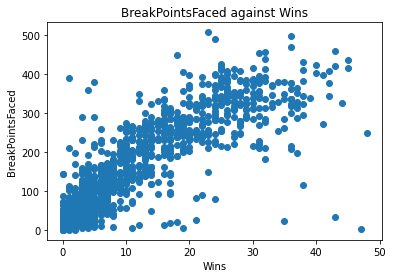

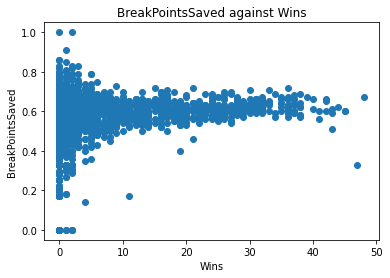

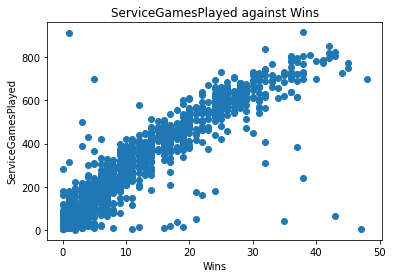

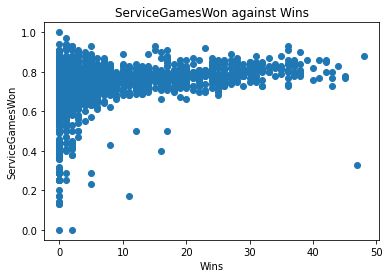

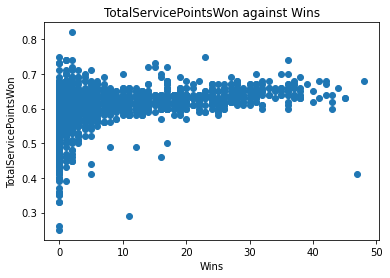

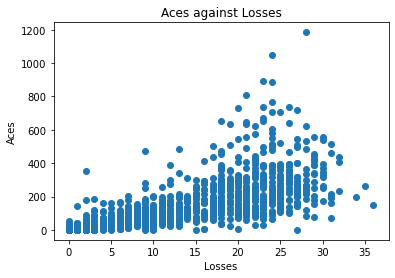

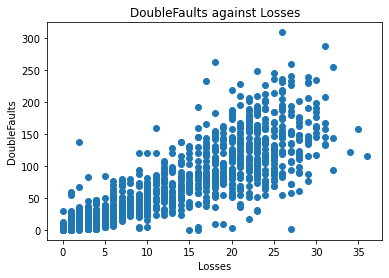

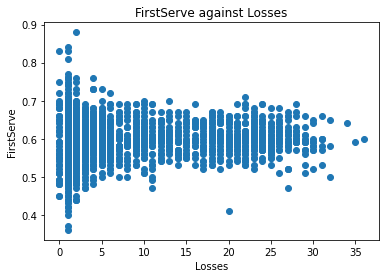

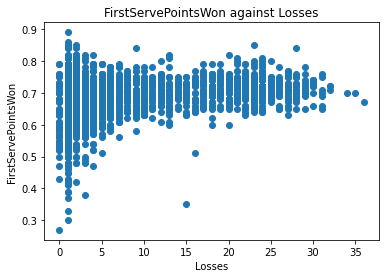

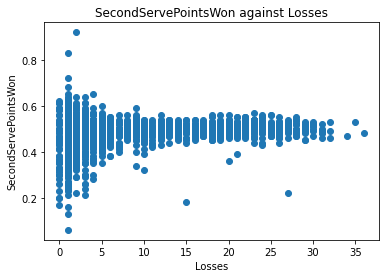

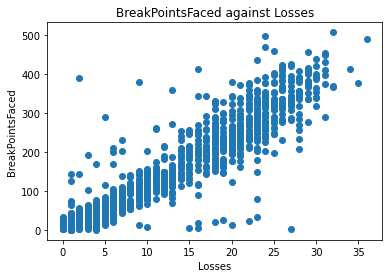

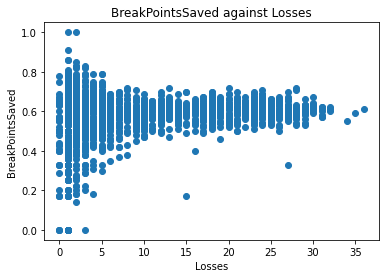

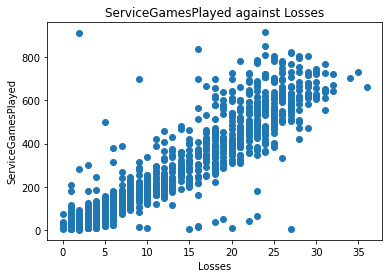

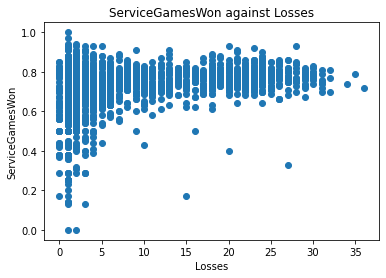

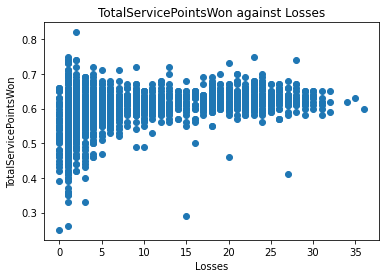

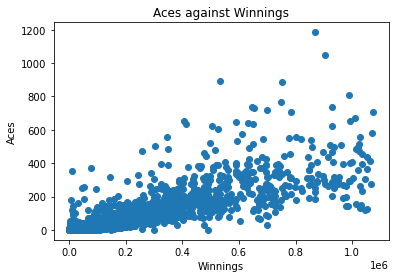

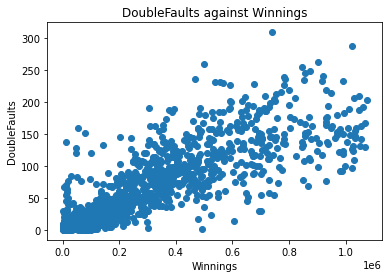

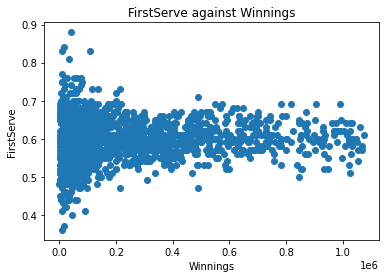

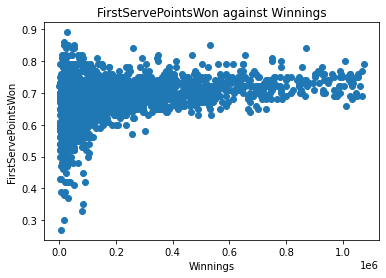

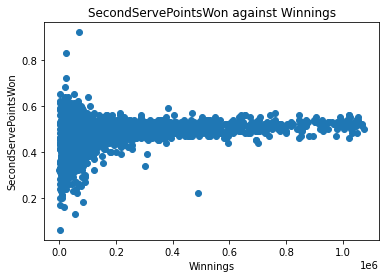

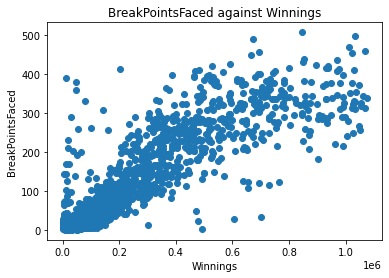

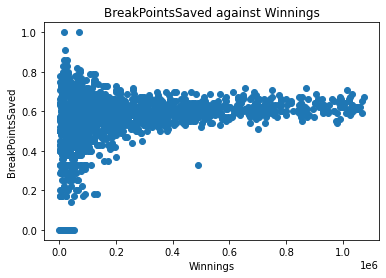

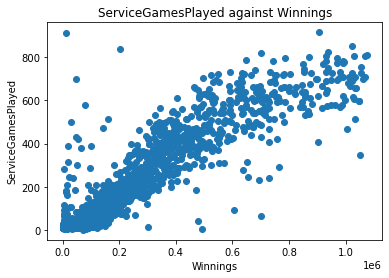

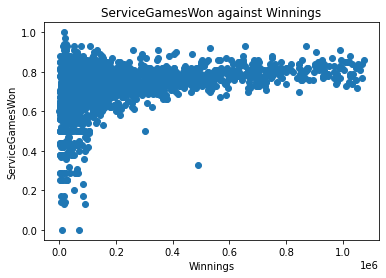

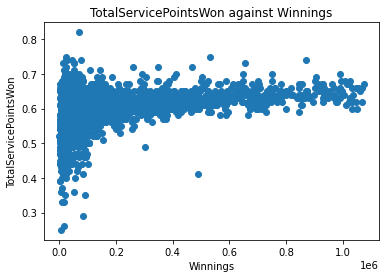

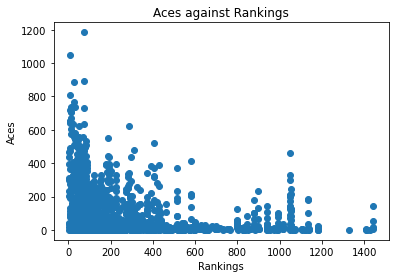

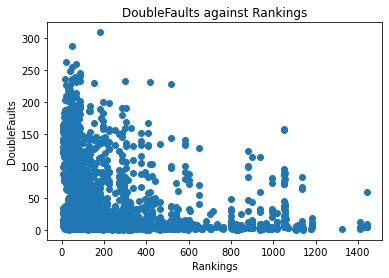

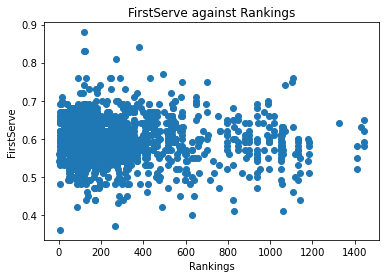

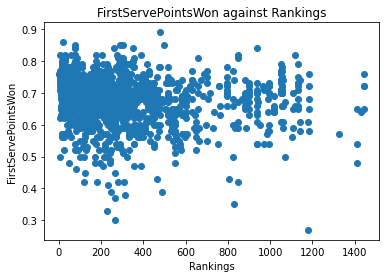

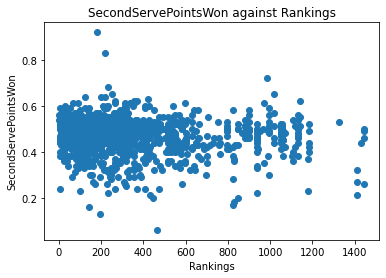

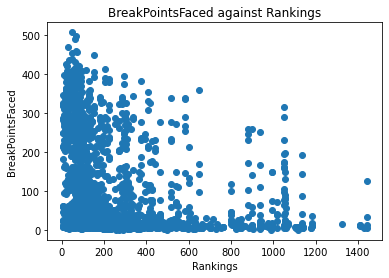

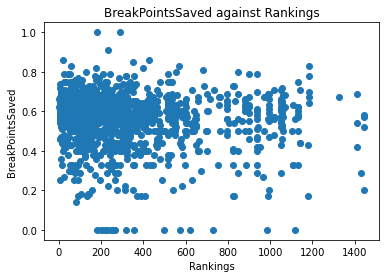

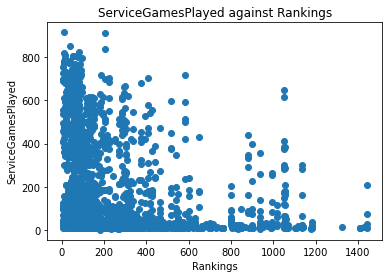

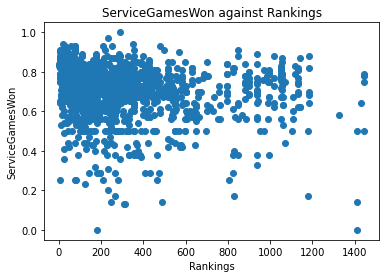

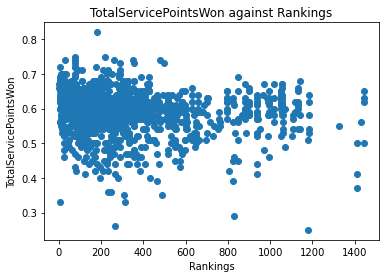

<Figure size 432x288 with 0 Axes>

In [4]:
offensive_vrs_outcomes(tennis)

In [5]:
# Function to plot defensive game statistics against outcomes
def defensive_vrs_outcomes(df):
    df_defensive = df[['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon']]
    df_outcomes = df[['Wins', 'Losses', 'Winnings', 'Ranking']]
    for col in df_defensive.columns:
        plt.scatter(df_outcomes.Wins, df_defensive[col])
        plt.xlabel('Wins')
        plt.ylabel(col)
        plt.title(col + ' against Wins')
        plt.show()
        plt.clf()
    for col in df_defensive.columns:
        plt.scatter(df_outcomes.Losses, df_defensive[col])
        plt.xlabel('Losses')
        plt.ylabel(col)
        plt.title(col + ' against Losses')
        plt.show()
        plt.clf()
    for col in df_defensive.columns:
        plt.scatter(df_outcomes.Winnings, df_defensive[col])
        plt.xlabel('Winnings')
        plt.ylabel(col)
        plt.title(col + ' against Winnings')
        plt.show()
        plt.clf()
    for col in df_defensive.columns:
        plt.scatter(df_outcomes.Ranking, df_defensive[col])
        plt.xlabel('Rankings')
        plt.ylabel(col)
        plt.title(col + ' against Rankings')
        plt.show()
        plt.clf()

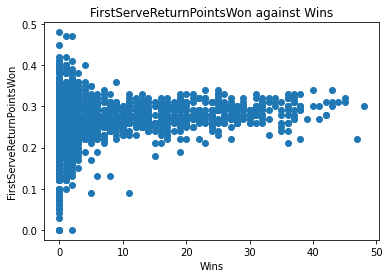

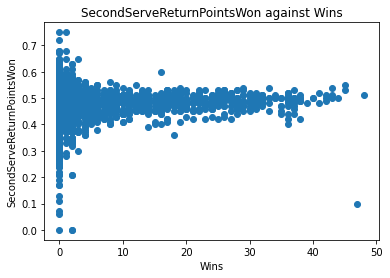

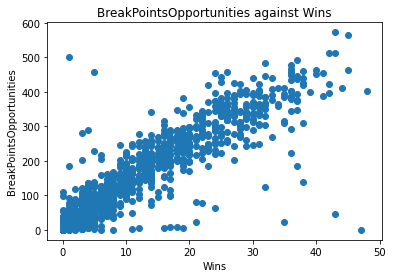

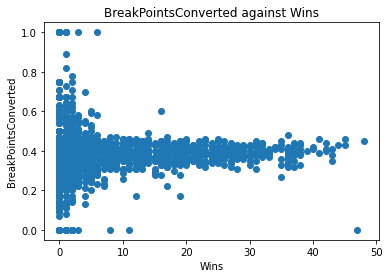

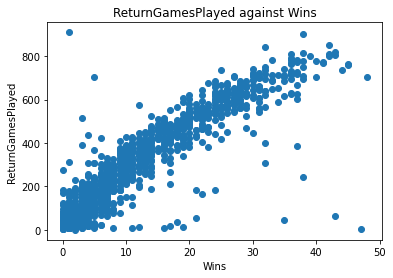

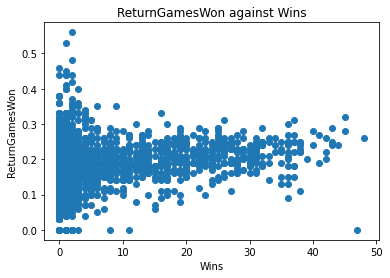

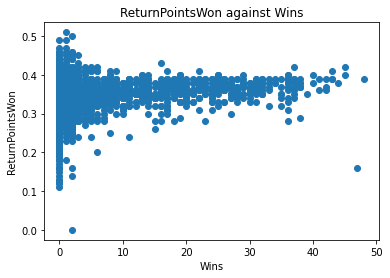

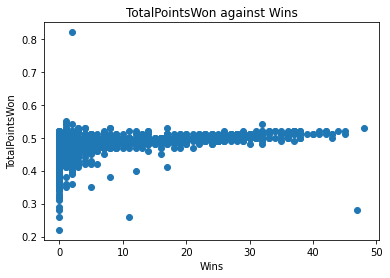

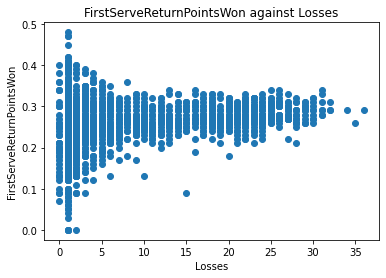

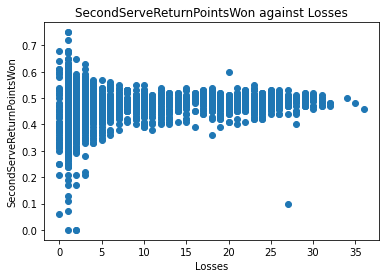

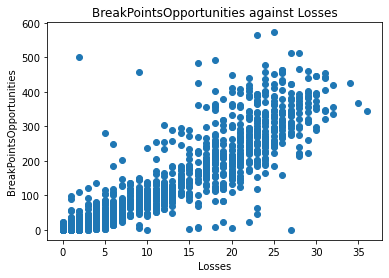

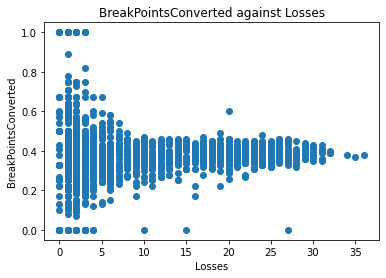

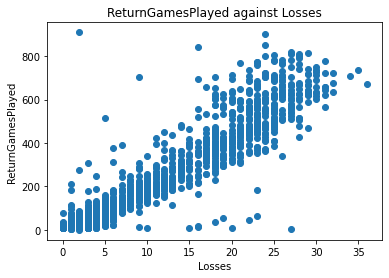

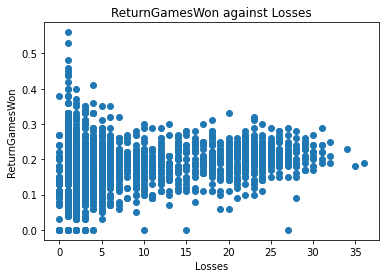

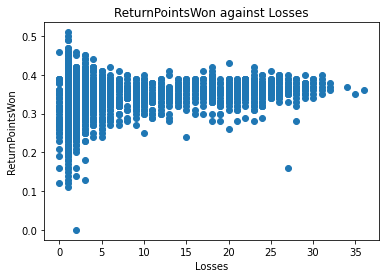

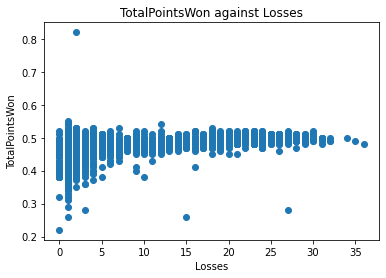

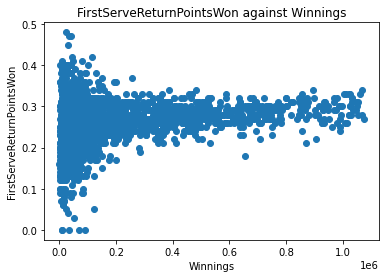

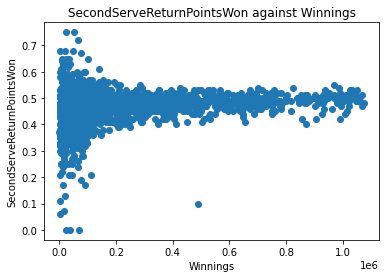

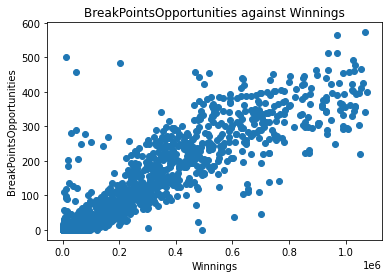

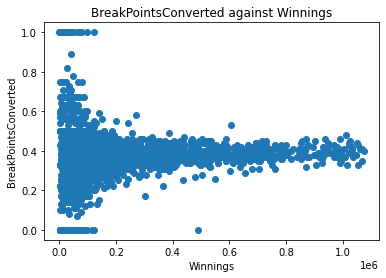

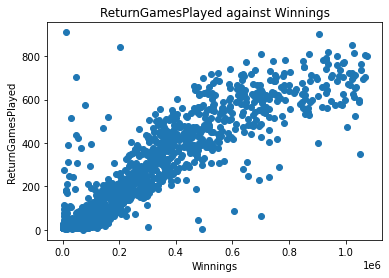

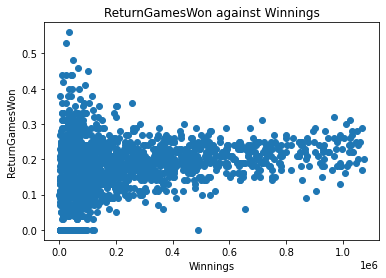

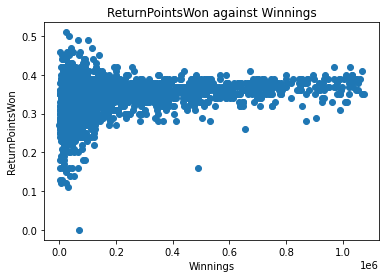

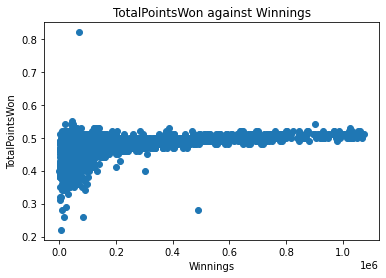

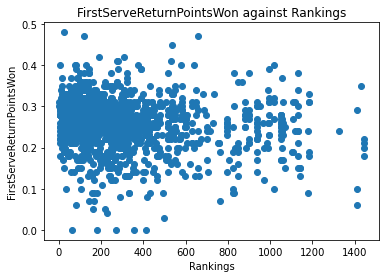

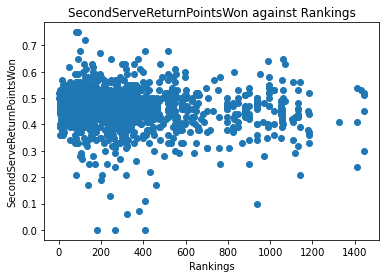

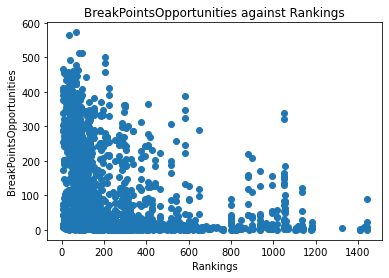

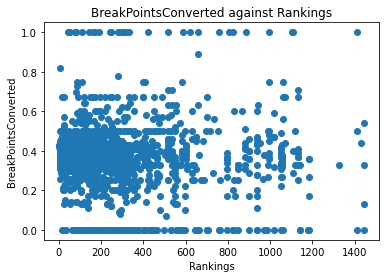

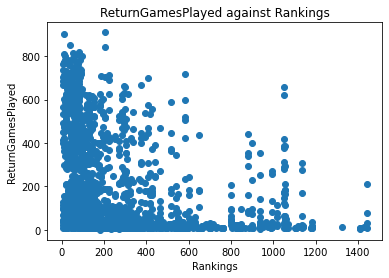

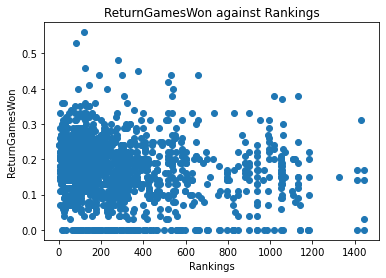

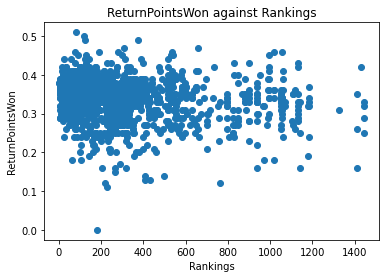

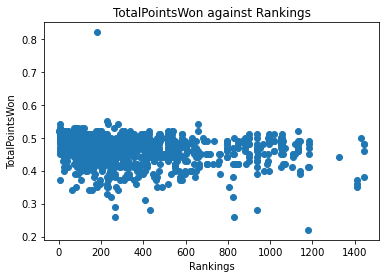

<Figure size 432x288 with 0 Axes>

In [6]:
defensive_vrs_outcomes(tennis)

In [7]:
# Viewing features with high correlation against outcome statistics(Wins, Losses, Winnings, Ranking)
tennis_corr = tennis.corr()[(tennis.corr() > 0.7) & (tennis.corr() < 0.99)]
tennis_corr = tennis_corr.loc[['Wins', 'Losses', 'Winnings']]
tennis_corr.drop(columns = ['Wins', 'Losses', 'Winnings'], inplace = True)
tennis_corr.dropna(axis = 1, how = 'all', inplace = True)
tennis_corr

,Aces,BreakPointsFaced,BreakPointsOpportunities,DoubleFaults,ReturnGamesPlayed,ServiceGamesPlayed
Wins,0.825301,0.883470,0.923453,0.847459,0.928408,0.929153
Losses,0.768628,0.943309,0.909295,0.881922,0.936755,0.935182
Winnings,0.798404,0.876036,0.900444,0.854685,0.912613,0.912985


In [8]:
# Features that affect winnings
features_winnings = tennis_corr.columns.to_list()
features_winnings

['Aces',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'DoubleFaults',
 'ReturnGamesPlayed',
 'ServiceGamesPlayed']

### Single Feature to predict Winnings

In [9]:
# Function that creates a model that uses a single feature to predict winnings
def single_feature(df, feature_list):
    for feature in feature_list:
        x = df[[feature]]
        y = df[['Winnings']]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        model = LinearRegression()
        model.fit(X_train, y_train)
        print('Train Score:', model.score(X_train, y_train))
        print('Test Score:', model.score(X_test, y_test))
        y_predict = model.predict(X_test)
        print((sorted(list(zip([feature],model.coef_)),key = lambda x: abs(x[-1]),reverse=True)))
        plt.scatter(y_test, y_predict)
        plt.xlabel('Winnings')
        plt.ylabel('Predicted Winnings')
        plt.show()

Train Score: 0.6434428309963356
Test Score: 0.6124727326826612
[('Aces', array([1430.76429604]))]


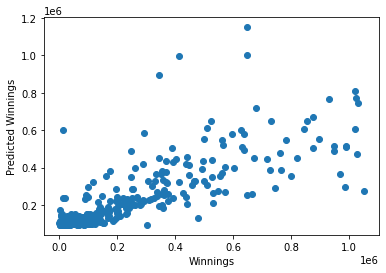

Train Score: 0.7603111064565294
Test Score: 0.7980670723040787
[('BreakPointsFaced', array([1857.50066228]))]


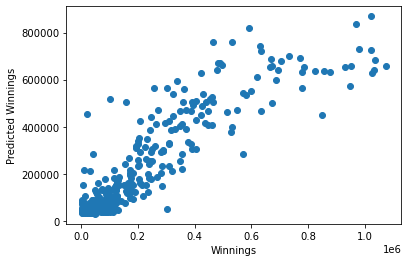

Train Score: 0.791902509974828
Test Score: 0.87219670326958
[('BreakPointsOpportunities', array([1836.97816267]))]


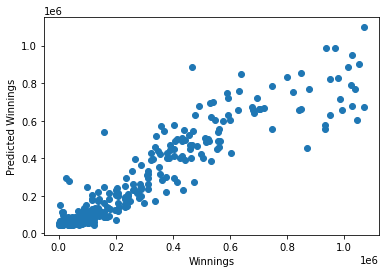

Train Score: 0.7370945428016635
Test Score: 0.7012627361840535
[('DoubleFaults', array([3850.25373377]))]


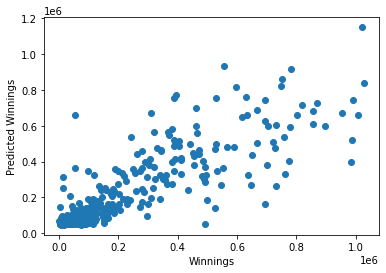

Train Score: 0.8227903010820513
Test Score: 0.8683344613351687
[('ReturnGamesPlayed', array([1032.29635561]))]


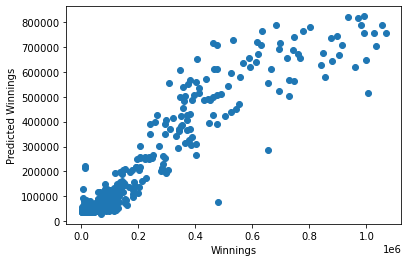

Train Score: 0.8432561171969812
Test Score: 0.7934822010379017
[('ServiceGamesPlayed', array([1060.40172151]))]


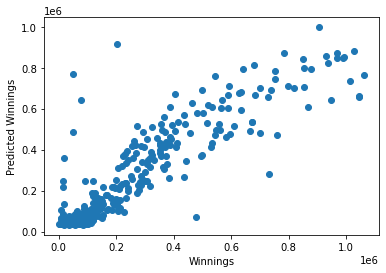

In [10]:
single_feature(tennis, features_winnings)

### Two Features to predict Winnings

In [11]:
# Function that creates a model that uses two features to predict winnings
def double_features(df, feature_list):
    for feature_1 in feature_list:
        for i in range(len(feature_list)-1):
            feature_2 = features_winnings[i+1]
            x = df[[feature_1, feature_2]]
            y = df[['Winnings']]
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
            model = LinearRegression()
            model.fit(X_train, y_train)
            print('Train Score:', model.score(X_train, y_train))
            print('Test Score:', model.score(X_test, y_test))
            y_predict = model.predict(X_test)
            print(sorted(list(zip([feature_1, feature_2], model.coef_)),key = lambda x: abs(x[-1]),reverse=True))
            plt.scatter(y_test, y_predict)
            plt.xlabel('Winnings')
            plt.ylabel('Predicted Winnings')
            plt.show()

Train Score: 0.8040700780130807
Test Score: 0.8331295964834753
[('Aces', array([ 542.3074654 , 1386.24452084]))]


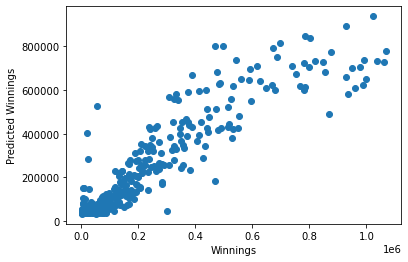

Train Score: 0.8327493790671605
Test Score: 0.8318505886982102
[('Aces', array([ 437.61445991, 1482.04407459]))]


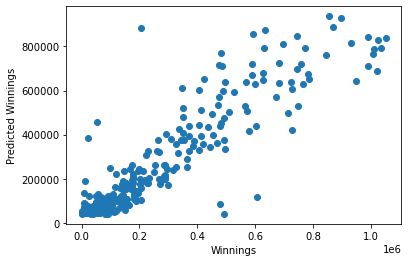

Train Score: 0.7594254641528975
Test Score: 0.7618036723736124
[('Aces', array([ 536.03392445, 2746.77327474]))]


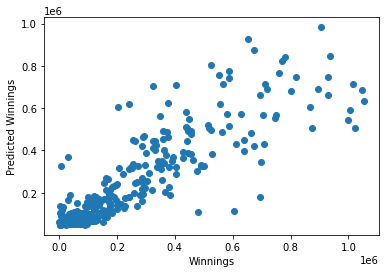

Train Score: 0.8272585531766828
Test Score: 0.8549793361290774
[('Aces', array([ 69.0122113 , 999.20043276]))]


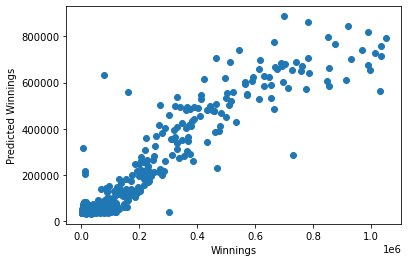

Train Score: 0.8243608377421446
Test Score: 0.8670624646150673
[('Aces', array([  37.93677202, 1009.80948945]))]


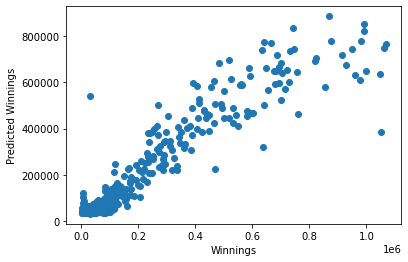

Train Score: 0.7709779946717301
Test Score: 0.7489713405516862
[('BreakPointsFaced', array([ 6.98900484e+15, -6.98900484e+15]))]


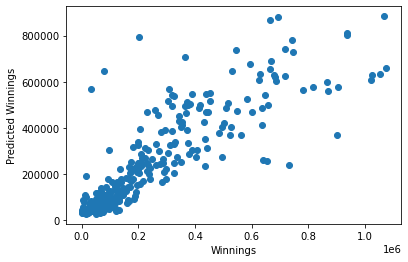

Train Score: 0.8120493378449263
Test Score: 0.8059649122029741
[('BreakPointsFaced', array([ -74.12812833, 1922.16733674]))]


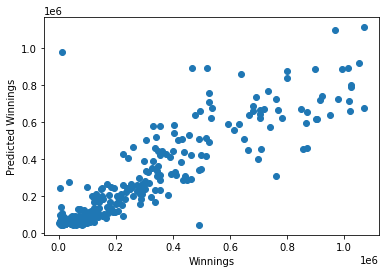

Train Score: 0.7817524228581622
Test Score: 0.7902047355197581
[('BreakPointsFaced', array([1202.90379442, 1519.46907406]))]


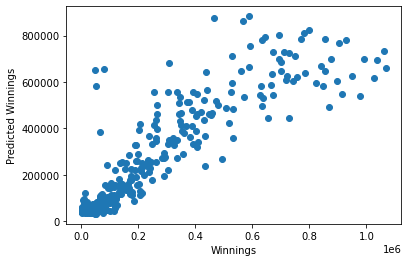

Train Score: 0.8348803082396865
Test Score: 0.8356794885748468
[('BreakPointsFaced', array([-409.98285384, 1257.50049737]))]


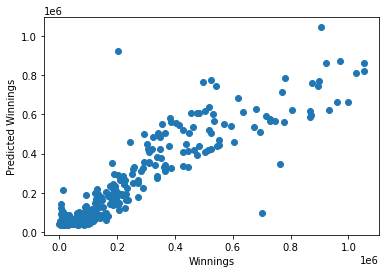

Train Score: 0.8273991064905002
Test Score: 0.8657990327419491
[('BreakPointsFaced', array([-412.94765959, 1260.25395615]))]


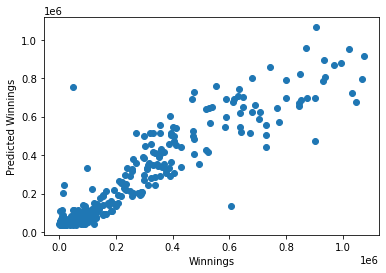

Train Score: 0.7984031589908219
Test Score: 0.8642261774508926
[('BreakPointsOpportunities', array([1904.73647586,  -48.72100084]))]


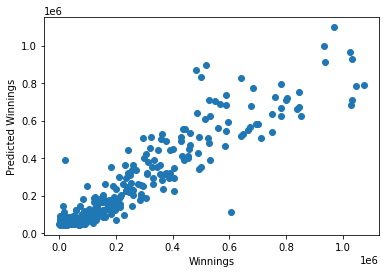

Train Score: 0.8153177929153119
Test Score: 0.7903424770823686
[('BreakPointsOpportunities', array([923.31531624, 923.31531624]))]


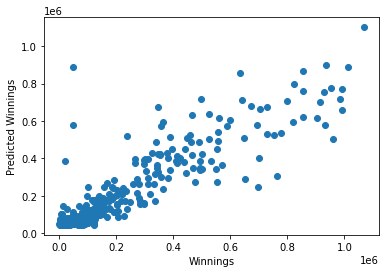

Train Score: 0.8175971813128602
Test Score: 0.8251902809462993
[('BreakPointsOpportunities', array([1472.40658285,  925.98492765]))]


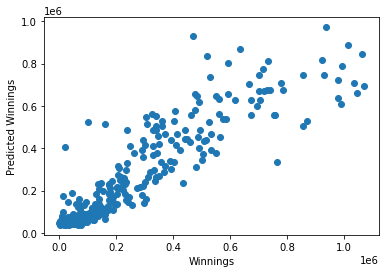

Train Score: 0.8367913429488298
Test Score: 0.8214603218414555
[('BreakPointsOpportunities', array([298.02246338, 886.11413406]))]


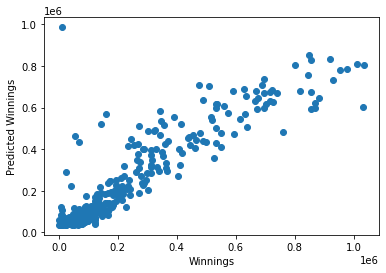

Train Score: 0.8299027320652625
Test Score: 0.8565251278371812
[('BreakPointsOpportunities', array([319.51875974, 879.30254288]))]


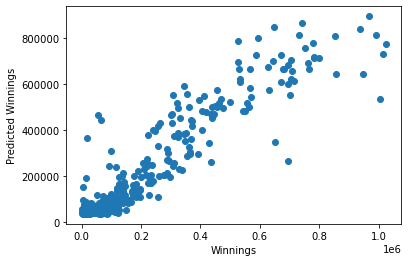

Train Score: 0.7757284509755151
Test Score: 0.8196290609067002
[('DoubleFaults', array([1420.74237907, 1225.1393175 ]))]


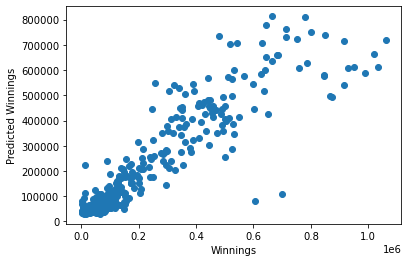

Train Score: 0.8239091958112581
Test Score: 0.7981398717025252
[('DoubleFaults', array([ 772.37587646, 1542.91371004]))]


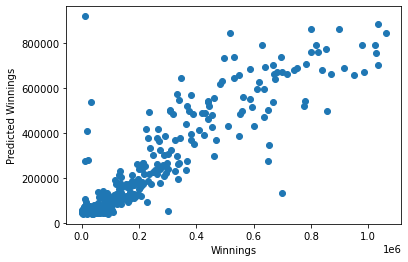

Train Score: 0.7378178615617916
Test Score: 0.6927743579710495
[('DoubleFaults', array([1934.72994895, 1934.72994895]))]


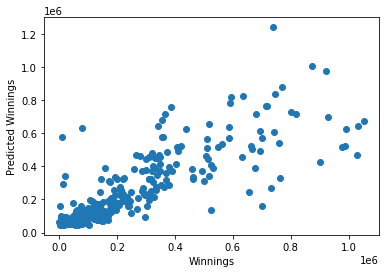

Train Score: 0.8412310033829468
Test Score: 0.7995682991405604
[('DoubleFaults', array([333.84663277, 966.7913895 ]))]


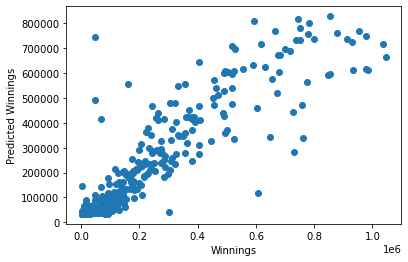

Train Score: 0.825142892811585
Test Score: 0.8661590209118117
[('DoubleFaults', array([211.2817509 , 986.76781011]))]


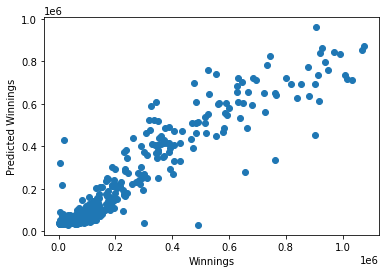

Train Score: 0.8304115158292742
Test Score: 0.854350579385629
[('ReturnGamesPlayed', array([1271.72137617, -442.309902  ]))]


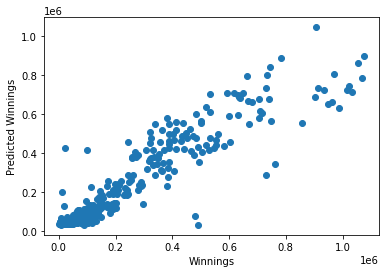

Train Score: 0.8435592330664353
Test Score: 0.7911547354097672
[('ReturnGamesPlayed', array([911.02524539, 254.42218576]))]


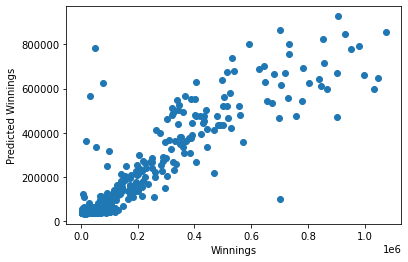

Train Score: 0.840361816204755
Test Score: 0.8076109434450908
[('ReturnGamesPlayed', array([1008.57614212,  133.52085169]))]


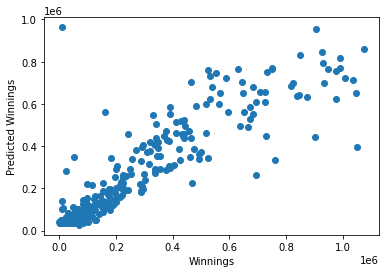

Train Score: 0.8322380683723906
Test Score: 0.83362961844954
[('ReturnGamesPlayed', array([522.05812798, 522.05812798]))]


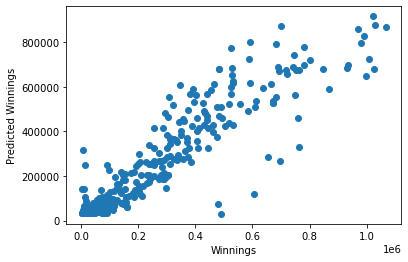

Train Score: 0.8306357404024467
Test Score: 0.8404601250646724
[('ReturnGamesPlayed', array([-1921.08369078,  2963.40423088]))]


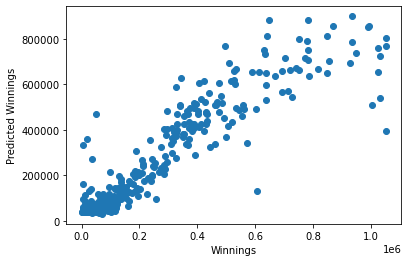

Train Score: 0.8484736342914568
Test Score: 0.7692404143744357
[('ServiceGamesPlayed', array([1302.88582498, -455.65781476]))]


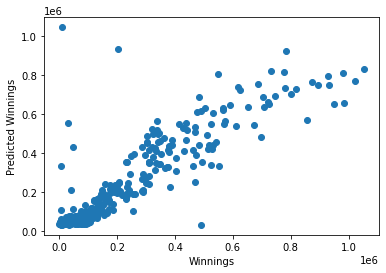

Train Score: 0.8383456062254234
Test Score: 0.8154304766370086
[('ServiceGamesPlayed', array([914.5832067 , 251.14974154]))]


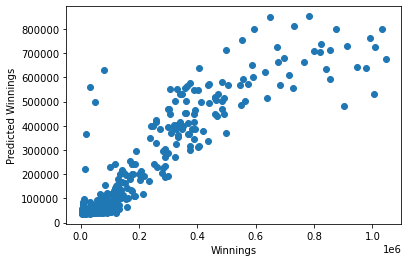

Train Score: 0.8379683528711643
Test Score: 0.8197392567090764
[('ServiceGamesPlayed', array([967.96240111, 303.0056616 ]))]


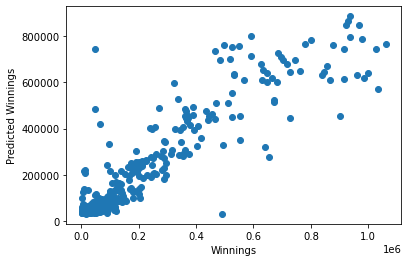

Train Score: 0.8417550489747514
Test Score: 0.8018101140425357
[('ServiceGamesPlayed', array([1685.42787138, -639.66101826]))]


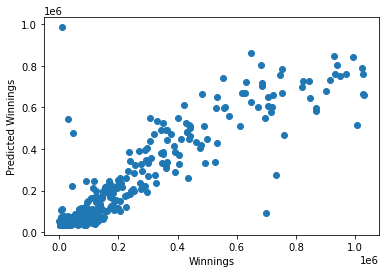

Train Score: 0.8376704494023275
Test Score: 0.8165359020259431
[('ServiceGamesPlayed', array([523.48047477, 523.48047477]))]


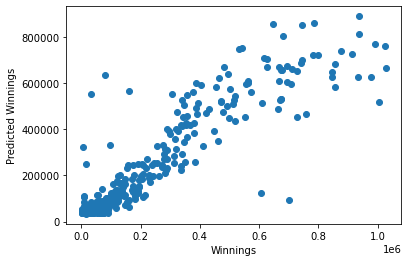

In [12]:
double_features(tennis, features_winnings)

### Multiple Features to predict Winnings

In [13]:
# Function that creates a model that uses multiple features to predict winnings
def multiple_features(df, feature_list):
    x = df[feature_list]
    y = df[['Winnings']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    y_predict = model.predict(X_test)
    print(sorted(list(zip(feature_list, model.coef_)), key = lambda x: abs(x[-1]), reverse = True))
    plt.scatter(y_test, y_predict)
    plt.xlabel('Winnings')
    plt.ylabel('Predicted Winnings')
    plt.show()

Train Score: 0.8443011308084047
Test Score: 0.8271852855410651
[('Aces', array([ -46.29614455, -737.88084898,  757.1551162 ,  650.74372327,
       -473.82242155, 1358.45516547]))]


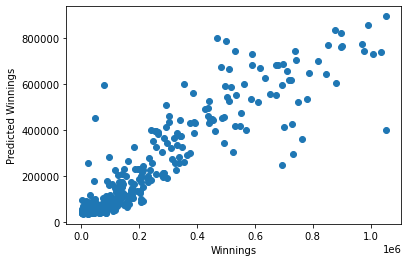

In [14]:
multiple_features(tennis, features_winnings)

In [22]:
# EXtracting all features from tennis dataframe
all_features_df = tennis.drop(columns = ['Player', 'Year', 'Wins', 'Losses', 'Winnings', 'Ranking'])
all_features_list = all_features_df.columns.to_list()
all_features_list

['FirstServe',
 'FirstServePointsWon',
 'FirstServeReturnPointsWon',
 'SecondServePointsWon',
 'SecondServeReturnPointsWon',
 'Aces',
 'BreakPointsConverted',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'BreakPointsSaved',
 'DoubleFaults',
 'ReturnGamesPlayed',
 'ReturnGamesWon',
 'ReturnPointsWon',
 'ServiceGamesPlayed',
 'ServiceGamesWon',
 'TotalPointsWon',
 'TotalServicePointsWon']

### All Features to predict Winnings

In [23]:
# Function that creates a model that all features to predict winnings
def all_features(feature_list):
    x = tennis[feature_list]
    y = tennis[['Winnings']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    y_predict = model.predict(X_test)
    print(sorted(list(zip(feature_list, model.coef_)), key = lambda x: abs(x[-1]), reverse = True))
    plt.scatter(y_test, y_predict)
    plt.xlabel('Winnings')
    plt.ylabel('Predicted Winnings')
    plt.show()

Train Score: 0.8447366475177646
Test Score: 0.8291220666659568
[('FirstServe', array([-8.51221923e+03, -6.82319311e+04, -7.85571349e+04, -3.07542277e+04,
        1.42406173e+03, -4.40095074e+01,  2.27084493e+03, -7.96420021e+02,
        7.95064443e+02,  5.20097698e+04,  5.81132603e+02, -4.57143433e+02,
        7.45722818e+04,  7.97367796e+04,  1.36079836e+03,  4.37495808e+03,
       -2.52238957e+05,  2.46836740e+05]))]


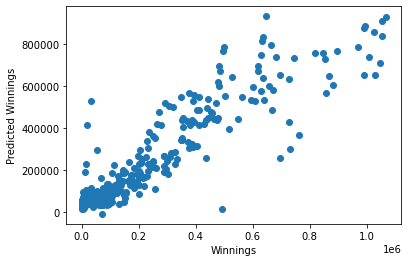

In [24]:
all_features(all_features_list)